<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/03_Clustering_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
#Loading data
df = pd.read_csv('/content/drive/MyDrive/Data/cust_seg.csv', index_col=[1])
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [ ]:
df['Defaulted'].value_counts

<bound method IndexOpsMixin.value_counts of Customer Id
1      0.0
2      0.0
3      1.0
4      0.0
5      0.0
      ... 
846    NaN
847    0.0
848    1.0
849    0.0
850    0.0
Name: Defaulted, Length: 850, dtype: float64>

In [ ]:
# Filling Nan values
df['Defaulted'].mean()
column_means = df.mean()
df = df.fillna(column_means)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [ ]:
df.drop(columns='Unnamed: 0',  inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


Trying to group customers using values from col Age & Education and DBSCAN

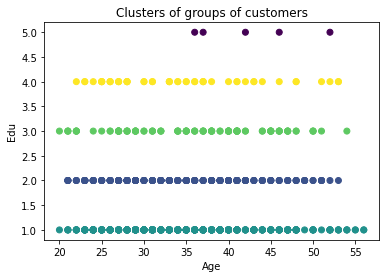

In [ ]:
# define the columns we want to work with
x = df.loc[:, ['Age', 'Edu']].values

# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_x)

df['cluster'] = dbs.labels_

# Visualize the clusters
plt.scatter(df['Age'], df['Edu'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Edu')
plt.title('Clusters of groups of customers');

DBSCAN seperating clusters pretty well. Lets check the score.

In [ ]:
silhouette_score(scaled_x, dbs.labels_)

0.32190125786953766

This score is really low, eventhough clastering looks good to me on visualization.

## Grouping by 'Card Debt' and 'Income'

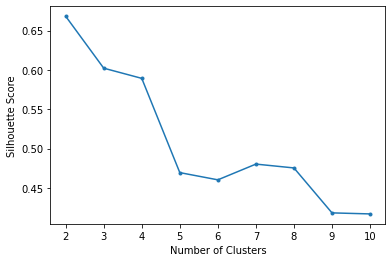

In [ ]:
# 'Card Debt'and 'Income'
# define the columns we want to work with
x1 = df.loc[:, ['Card Debt', 'Income']].values

# scale the data
scaler = StandardScaler()
scaled_x1 = scaler.fit_transform(x1)

# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_x1)
  silhouette_scores.append(silhouette_score(scaled_x1, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Per plot above 2 clusters should give us the best result

In [ ]:
# Instantiate KMeans with 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_x1)
silhouette_score(scaled_x1, kmeans.labels_)

0.6682773070346903

Seperating customers based on Card Debt and Income and using KMeans gives us much better result.

In [ ]:
# See Hierarchical clustering silhouette score on the same col
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_x1)
silhouette_score(scaled_x1, hc.labels_)

0.5435863708875828

This model above gives lower score.

In [ ]:
# See DBSCAN silhouette score
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_x1)
silhouette_score(scaled_x1, dbs.labels_)

0.6965886820590997

DBSCAN gives us the best result so far with grouping by Card Debt and Income.

## Grouping by Other Debt & DebtIncomeRatio

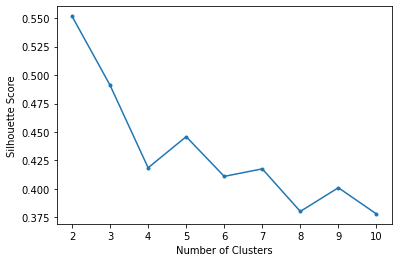

In [ ]:
# define the columns we want to work with
x2 = df.loc[:, [ 'Other Debt', 'DebtIncomeRatio']].values

# scale the data
scaler = StandardScaler()
scaled_x2 = scaler.fit_transform(x2)

# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_x2)
  silhouette_scores.append(silhouette_score(scaled_x2, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');


In [ ]:
# Instantiate KMeans with 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_x2)
silhouette_score(scaled_x2, kmeans.labels_)

0.5516174904325106

In [ ]:
# See Hierarchical clustering silhouette score on the same col
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_x2)
silhouette_score(scaled_x2, hc.labels_)

0.5868445539971946

In [ ]:
# See DBSCAN silhouette score
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_x2)
silhouette_score(scaled_x2, dbs.labels_)

0.5878236746469223

Comparing based on 'Other Debt' and 'DebtIncomeRatio' gave us the best result of 0.58, which is still lower then grouping by 'Card Debt' and 'Income'.

## Grouping by 'Years Employed' and 'Income'

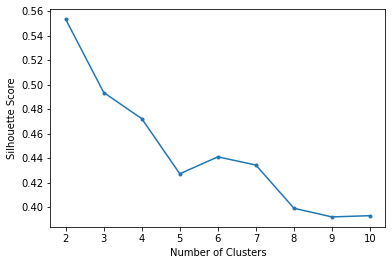

In [ ]:
# define the columns we want to work with
x3 = df.loc[:, [ 'Years Employed', 'Income']].values

# scale the data
scaler = StandardScaler()
scaled_x3 = scaler.fit_transform(x3)

# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_x3)
  silhouette_scores.append(silhouette_score(scaled_x3, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
# Instantiate KMeans with 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_x3)
silhouette_score(scaled_x3, kmeans.labels_)

0.5533612711380194

In [ ]:
# See Hierarchical clustering silhouette score on the same col
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_x3)
silhouette_score(scaled_x3, hc.labels_)

0.4803377427962272

In [ ]:
# See DBSCAN silhouette score
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_x3)
silhouette_score(scaled_x3, dbs.labels_)

0.6189272511355922

Based on results above, we can see, that the best predictions we have grouping people by 'Card Debt' and 'Income' and using DBSCAN model to make predictions.

Now, I'm going to try to use all features.


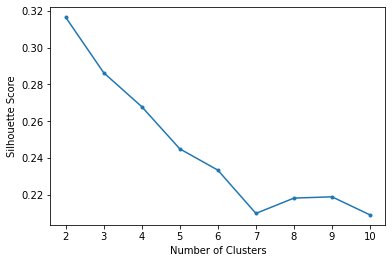

In [ ]:
# scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
# Instantiate KMeans with 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.31645079060431736

In [ ]:
# See Hierarchical clustering silhouette score on the same col
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.2589153165723505

In [ ]:
# See DBSCAN silhouette score
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

-0.26941576912194276

So using all features gives us worth predictions, then using some features.